In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
#pandas for data manupulation
#numpy for binning and scientific calculations
#matplotlib for visualizations
#seaborn for advanced visualzations

# Importing the dataset

In [32]:
df = pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [33]:
df.shape

(1000, 16)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [35]:
(df.isnull().sum()/len(df))*100

Poster_Link       0.0
Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [36]:
df['Gross'] = df['Gross'].str.replace(',','').astype(float)

In [37]:
df['Gross'].fillna(df['Gross'].mode()[0], inplace=True)
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)
df['Meta_score'].fillna(df['Meta_score'].mode()[0], inplace=True)

In [38]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [39]:
df.describe(include="all")

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,1000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000,1000,1000,1.000000e+03,1.000000e+03
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,NaN
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN
freq,1,2,32,335,23,85,NaN,1,NaN,14,12,7,5,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.662000,NaN,NaN,NaN,NaN,NaN,2.736929e+05,5.727372e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,11.384699,NaN,NaN,NaN,NaN,NaN,3.273727e+05,1.028465e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,1.305000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,4.360000e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,1.070275e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,85.250000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,6.153989e+07


In [40]:
#let's make a dataset to do visualization and stuff
df1 = df

[]

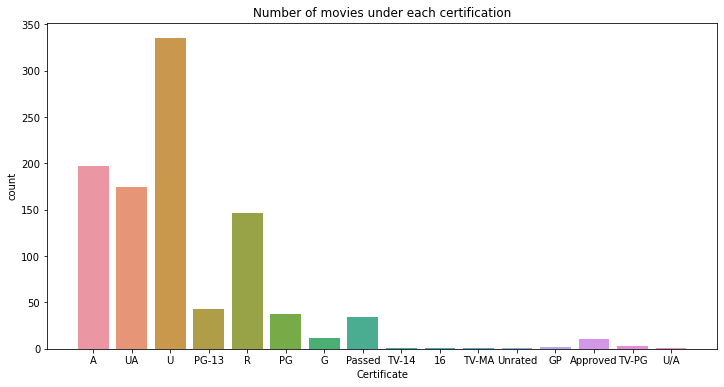

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=df1, x='Certificate')
plt.title("Number of movies under each certification")
plt.plot()

[]

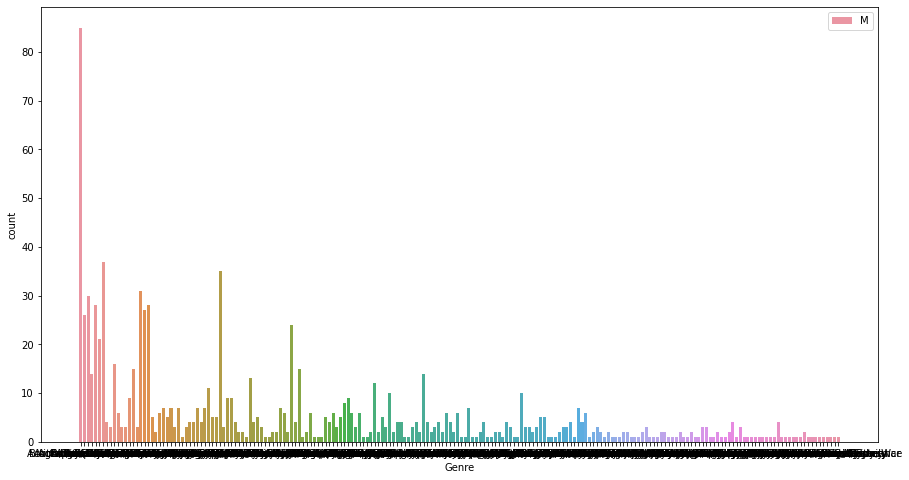

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(data=df1, x="Genre")
plt.legend("Movies under each genre")
plt.plot()

In [43]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

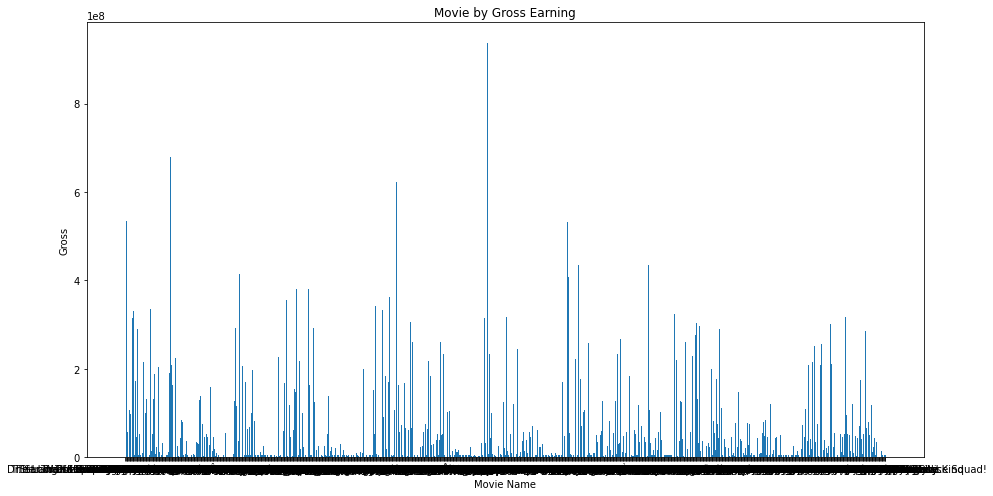

In [44]:
plt.figure(figsize=(15,8))
plt.bar(df["Series_Title"], df["Gross"])
plt.xlabel("Movie Name")
plt.ylabel("Gross")
plt.title("Movie by Gross Earning")
plt.show()

1) difference between meta score and rating
2) 

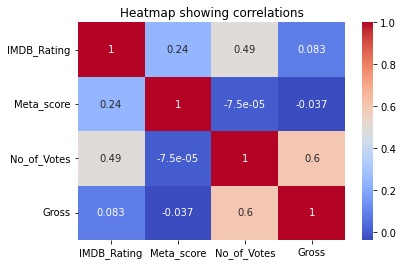

In [45]:
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap showing correlations")
plt.show()

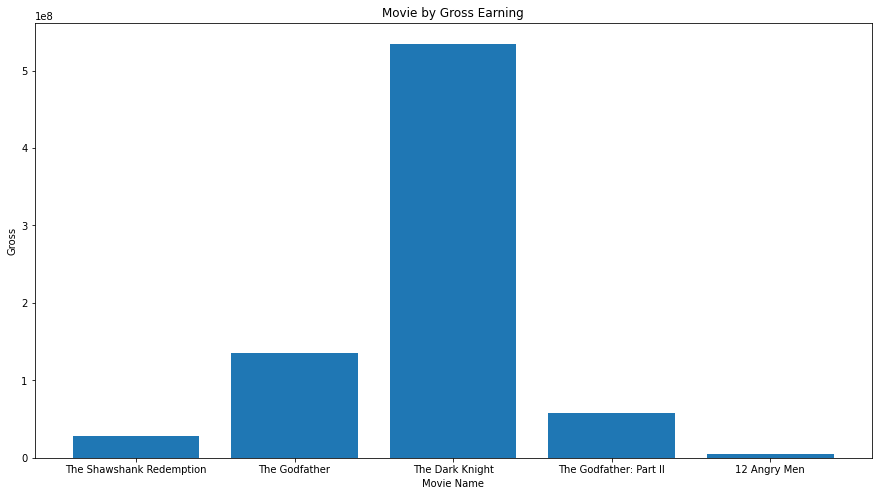

In [48]:
plt.figure(figsize=(15,8))
plt.bar(df["Series_Title"].head(), df["Gross"].head())
plt.xlabel("Movie Name")
plt.ylabel("Gross")
plt.title("Movie by Gross Earning")
plt.show()

***Ordinal data->*** It is a ranked categorical data, like in education there are primary, secondary, etc. If there are missing values, we can either drop them, drop the column, or fill them with the mode on the basis of the situation.

***Nominal data->*** It is a type of categorical data where values are used to label or name categories without implying any order or ranking among them. Each category is distinct and cannot be meaningfully compared in terms of greater or lesser value.